# **1.0) Project Introduction**

Our project will do an in-depth analysis of Chicago traffic data, that will provide drivers with relevant information to keep them safe on the road. We will explore how factors such as weather, visibility, driver alertness, time, and vehicles affect traffic crashes.

# **1.1) Changes since the proposal**

For our proposal, we decided to focus on three major American cities: Chicago, Los Angeles, and New York. We decided to change the scope to focus on Chicago data only, because the data that was in the other cities was not consistent, and they were not as in-depth as the Chicago dataset was. The Chicago data portal offers three very detailed data sets that will provide a better analysis than our previously proposed scope. Changing our scope to focusing on Chicago data will allow us to focus our efforts on analyzing the data instead of spending lots of time cleaning the three separate cities’ data sets and trying to pull common relevant information from each.

# **1.2) Data**

### Explanation of each data set:

**Traffic Crashes - Crashes:**
> “Crash data shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of the Chicago Police Department (CPD). Data are shown as is from the electronic crash reporting system (E-Crash) at CPD, excluding any personally identifiable information.” ( description provided by: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data )

We plan on using this data set to provide analysis on crash information such as lighting and road conditions, posted speed limits, contributing causes of the crash, as well as specific coordinates of the incident. This will provide us with the means to create heat maps of various traffic accidents by locations and an analysis of damages. Utilizing the Chicago data portal will also allow a wider analysis of the following Traffic Crash data sets via a crash_record_id column that is present in all three data sets. 

**Traffic Crashes - Vehicles:** 
> “This dataset contains information about vehicles (or units as they are identified in crash reports) involved in a traffic crash. This dataset will be used in conjunction with the traffic Crash and People dataset available in the portal. “Vehicle” information includes motor vehicle and non-motor vehicle modes of transportation, such as bicycles and pedestrians. Each mode of transportation involved in a crash is a “unit” and get one entry here. Each vehicle, each pedestrian, each motorcyclist, and each bicyclist is considered an independent unit that can have a trajectory separate from the other units.” ( description provided by:  https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data )

The Vehicles data set will provide us information on the make and model of the car, as well as information about the vehicle at the time of the crash. This includes direction of travel, any known defects, where contact was made with the vehicle, as well as any maneuver the driver may have executed. This data set also includes information regarding whether the parties of the incident were pedestrians, bicyclists, or drivers. 

**Traffic Crashes - People:**
> “This data contains information about people involved in a crash and if any injuries were sustained. This dataset should be used in combination with the traffic Crash and Vehicle dataset. Each record corresponds to an occupant in a vehicle listed in the Crash dataset. Some people involved in a crash may not have been occupants in a motor vehicle, but may have been a pedestrians, bicyclists, or using another non-motor vehicle mode of transportation. Injuries reported are reported by the responding police officer.” ( description provided by: https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data )

The People data set tracks several metrics such as the class of driver’s license possessed, whether a safety belt was used, or whether airbags were deployed. This data set will be instrumental in our analysis of the human factor of these crashes, as well as quantifying impact and safety of driving practices. We will also be able to use the crash_record_id to perform any analysis of crash records based on age or sex, which will also be important for our hypotheses and exploratory analysis.

# Common Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

# 2.0) Exploratory Data Analyses

### 2.1) EDA of the number of units involved in a crash (by Jackson Weisner)

The following bar charts visualize the number of units that are involved in crashes. This shows us that the most frequent number of units involved in crashes is 2. There are fewer crashes where number of units exceeds 3.

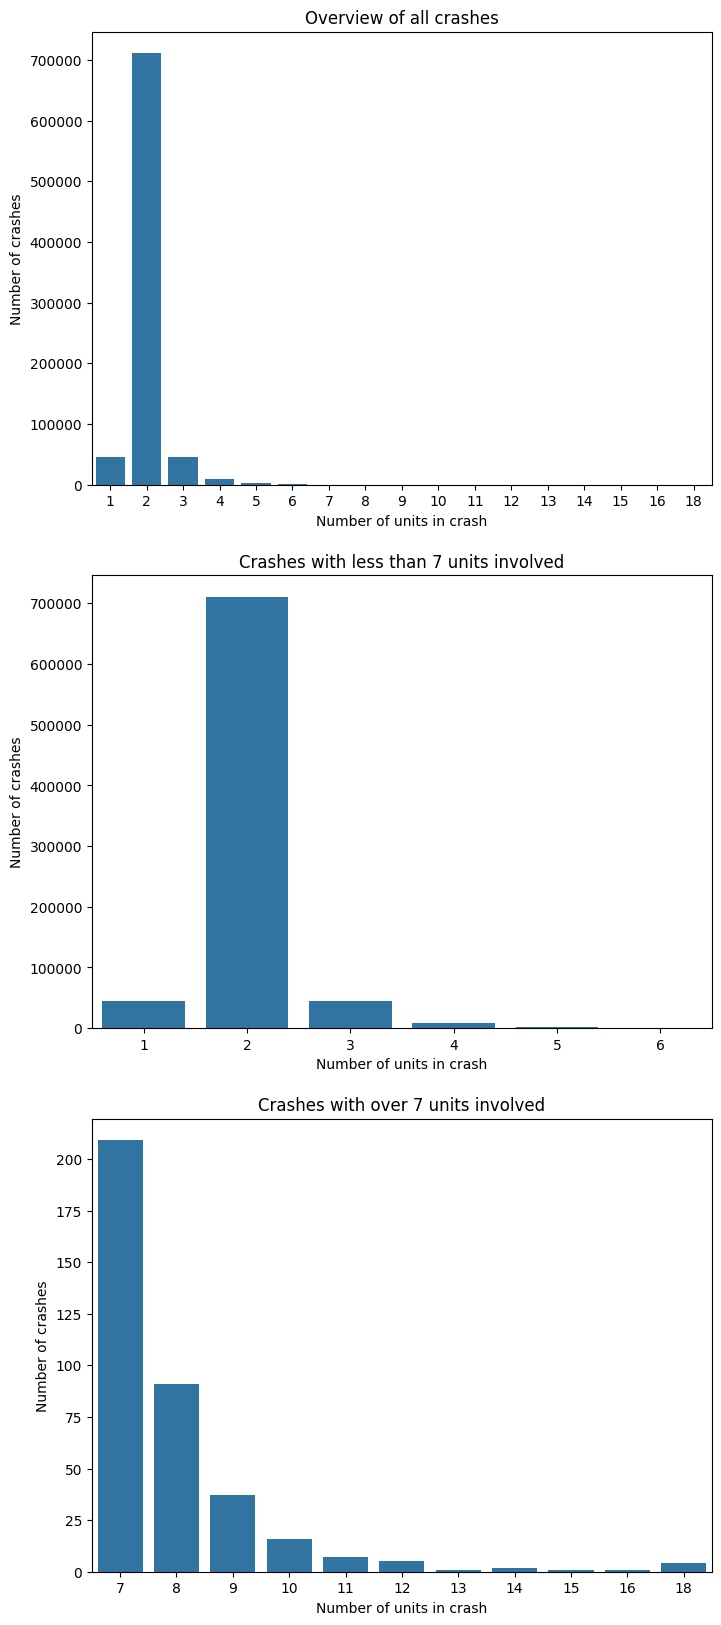

In [2]:
crashes_df = pd.read_csv('../data/chicago.csv')
num_units_count = crashes_df.groupby('NUM_UNITS')['NUM_UNITS'].count()

split_counts = lambda b : crashes_df[b].groupby('NUM_UNITS')['NUM_UNITS'].count()
num_units_below_t = split_counts(crashes_df['NUM_UNITS'] < 7)
num_units_above_t = split_counts(crashes_df['NUM_UNITS'] >= 7)

figure, ax = plt.subplots(3, 1, figsize=(8,20))

plot_1 = sns.barplot(num_units_count, ax=ax[0])
plot_2 = sns.barplot(num_units_below_t, ax=ax[1])
plot_3 = sns.barplot(num_units_above_t, ax=ax[2])

def set_plot_styles(plot, title):
    plot.set_title(title)
    plot.set_ylabel('Number of crashes')
    plot.set_xlabel('Number of units in crash')

set_plot_styles(plot_1, 'Overview of all crashes')
set_plot_styles(plot_2, 'Crashes with less than 7 units involved')
set_plot_styles(plot_3, 'Crashes with over 7 units involved')
plt.show()

### 2.2) EDA Pie charts of weather conditions in crashes (by Jackson Weisner)

(description)

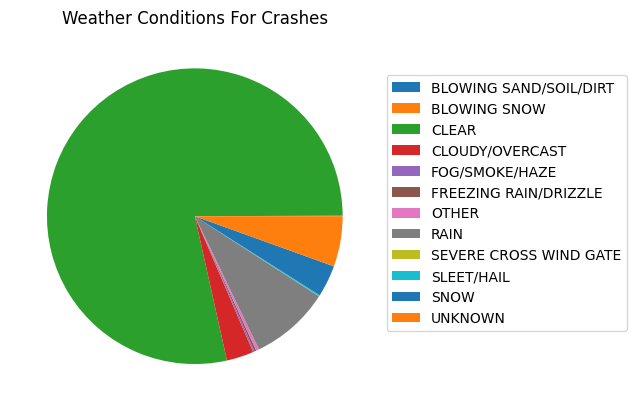

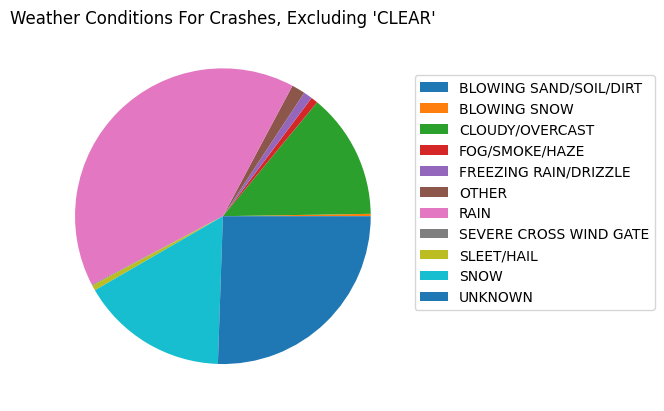

In [3]:
weather_condition_counts = crashes_df.groupby('WEATHER_CONDITION')['WEATHER_CONDITION'].count()
weather_excluding_clear = crashes_df[crashes_df['WEATHER_CONDITION'] != 'CLEAR'].groupby('WEATHER_CONDITION')['WEATHER_CONDITION'].count()
keys = [
    'BLOWING SAND/SOIL/DIRT',
    'BLOWING SNOW',
    'CLEAR',
    'CLOUDY/OVERCAST',
    'FOG/SMOKE/HAZE',
    'FREEZING RAIN/DRIZZLE',
    'OTHER',
    'RAIN',
    'SEVERE CROSS WIND GATE',
    'SLEET/HAIL',
    'SNOW',
    'UNKNOWN',
]


plt.figure(0)
plt.pie(weather_condition_counts, labels=None)
plt.legend(keys, bbox_to_anchor=(1,0.9))
plt.title('Weather Conditions For Crashes')

plt.figure(1)
plt.pie(weather_excluding_clear, labels=None)
keys.remove("CLEAR")
plt.legend(keys, bbox_to_anchor=(1,0.9))
plt.title('Weather Conditions For Crashes, Excluding \'CLEAR\'')

plt.show()
del crashes_df

### 2.3) EDA of Age and Gender (by Erica Hammond)

(description)

In [4]:
people_df = pd.read_csv('../data/chicago_people.csv', low_memory=False)

### 2.4) EDA of age distribution involved in crashes (by Erica Hammond)

(description)

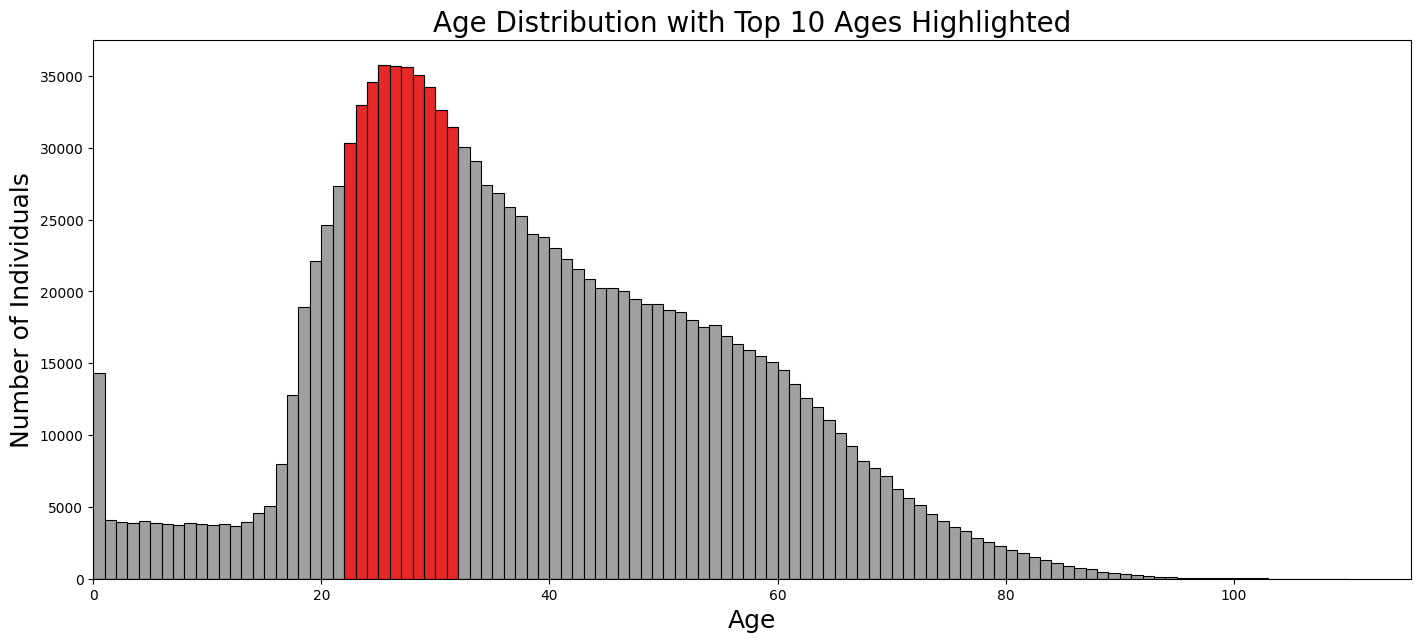

In [5]:
# Age Distribution
ages = people_df['AGE']

ages = ages[ages >= 0]

# top 10 
age_counts = pd.Series(ages).value_counts()
top_10_ages = age_counts.head(10).index

plt.figure(figsize=(17, 7))

# histogram
sns.histplot(ages, bins=range(int(ages.min()), int(ages.max()) + 1), color='grey', kde=False)

# highlights
sns.histplot([age for age in ages if age in top_10_ages], bins=range(int(ages.min()), int(ages.max()) + 1), color='red', kde=False)
# sns.histplot([age for age in ages if age == 0], bins=range(int(ages.min()), int(ages.max()) + 1), color='black', kde=False)
# originally was going to label 0 as unknown age but realized it could indicate a high(er) number of crashes involving infants < 1 year old


plt.title('Age Distribution with Top 10 Ages Highlighted', fontsize=20)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Number of Individuals', fontsize=18)
plt.xlim(left=0)

plt.show()

# I don't know why it turned ugly... it was good earlier. I'll fix at a later date if needed.

### 2.5) EDA of Gender distribution involved in crashes (by Erica Hammond)

(description)

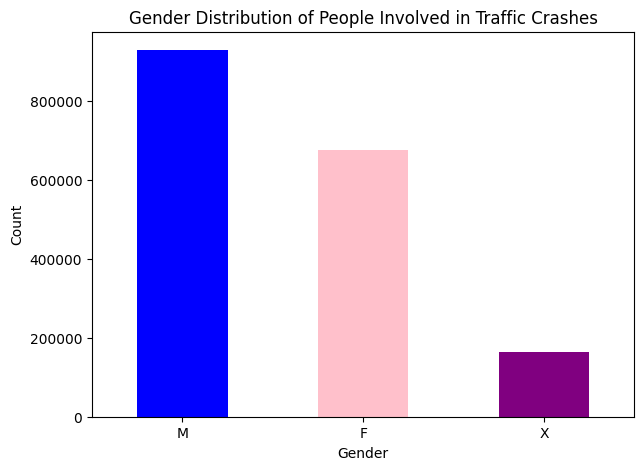

In [6]:
# Gender distribution
gender_counts = people_df['SEX'].value_counts()
gender_colors = {'M': 'blue', 'F': 'pink', 'X': 'purple'}

plt.figure(figsize=(7, 5))
gender_counts.plot(kind='bar', color=[gender_colors[gender] for gender in gender_counts.index])
plt.title('Gender Distribution of People Involved in Traffic Crashes')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

### 2.6) EDA of Age x Gender (by Erica Hammond)

(description)

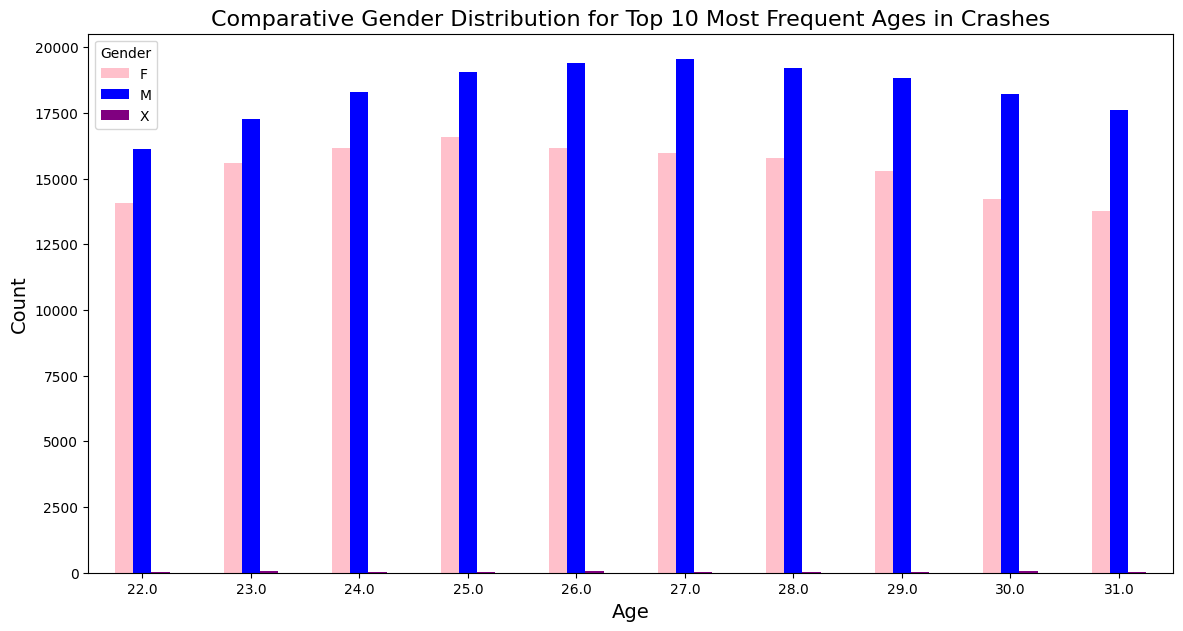

In [7]:
# Gender distribution of the top 10 most frequent ages
age_data = people_df['AGE']
gender_data = people_df['SEX'].value_counts()
top_10_ages = people_df['AGE'].value_counts().head(10).index

# rows with ages in the top 10
top_10_df = people_df[people_df['AGE'].isin(top_10_ages)]

# group by 'AGE' and 'SEX'
grouped_data = top_10_df.groupby(['AGE', 'SEX']).size().unstack(fill_value=0)

colors = {'M': 'blue', 'F': 'pink', 'X': 'purple'}
grouped_data.plot(kind='bar', stacked=False, figsize=(14, 7), color=[colors[sex] for sex in grouped_data.columns])

plt.title('Comparative Gender Distribution for Top 10 Most Frequent Ages in Crashes', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Gender')

plt.show()
del people_df

### 2.7) EDA of Hit and Runs and Crash Times (by Mohammed Riaz)

(description)

/tmp/ipykernel_31449/1417449757.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_crashes['CRASH_DATE'] = pd.to_datetime(df_crashes['CRASH_DATE'])


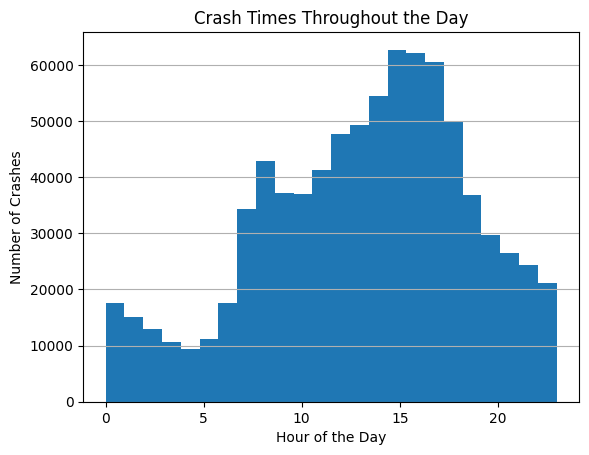

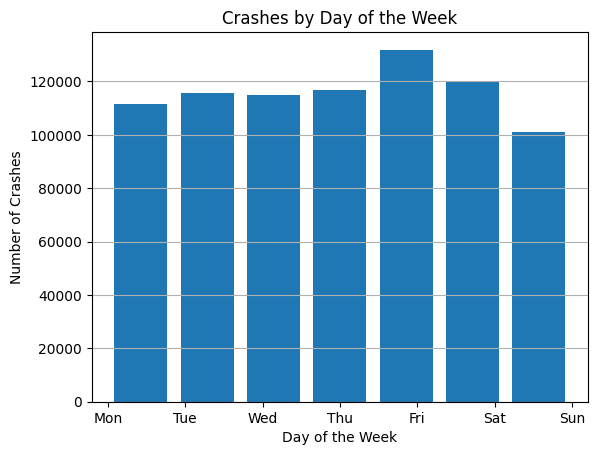

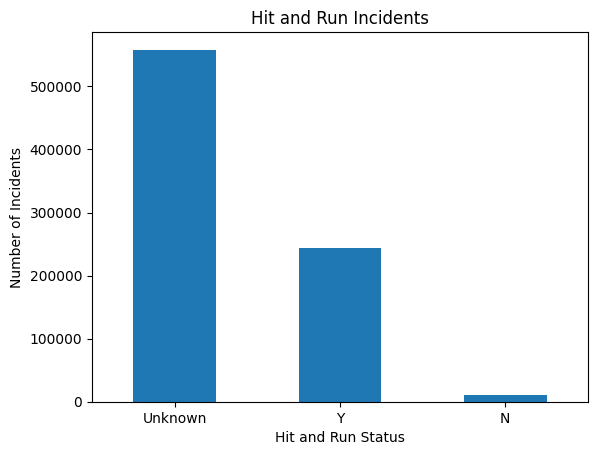

In [8]:
df_crashes = pd.read_csv('../data/chicago.csv')


df_crashes['CRASH_DATE'] = pd.to_datetime(df_crashes['CRASH_DATE'])

# Histogram of the hour of day when crashes occur
df_crashes['CRASH_HOUR'] = df_crashes['CRASH_DATE'].dt.hour
df_crashes['CRASH_HOUR'].plot(kind='hist', bins=24, title='Crash Times Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.grid(axis='y')
plt.show()

# Histogram of the day of the week when crashes occur
df_crashes['CRASH_DAY_OF_WEEK'] = df_crashes['CRASH_DATE'].dt.dayofweek
df_crashes['CRASH_DAY_OF_WEEK'].plot(kind='hist', bins=7, rwidth=0.8, title='Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Number of Crashes')
plt.grid(axis='y')
plt.show()

# Bar chart for hit and runs
df_crashes['HIT_AND_RUN_I'] = df_crashes['HIT_AND_RUN_I'].fillna('Unknown')

hit_and_run_counts = df_crashes['HIT_AND_RUN_I'].value_counts()

hit_and_run_counts.plot(kind='bar', title='Hit and Run Incidents')
plt.xlabel('Hit and Run Status')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)  # Rotate labels to make them readable

plt.show()
del df_crashes

### 2.8) EDA of lighting conditions when crashes occur (by Prit Patel)

(description)

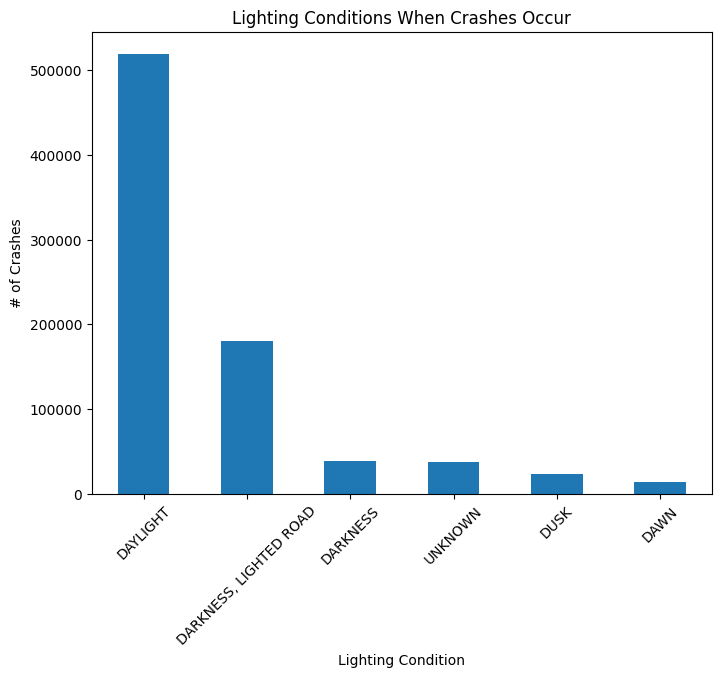

In [9]:
# Loading data from Prit's laptop
traffic_crashes = pd.read_csv('../data/chicago.csv', low_memory=False)

l = traffic_crashes['LIGHTING_CONDITION']
lighting = l.value_counts()

# Create histogram
plt.figure(figsize=(8, 6))
lighting.plot(kind='bar')

plt.title('Lighting Conditions When Crashes Occur')
plt.xlabel('Lighting Condition')
plt.ylabel('# of Crashes')
plt.xticks(rotation=45)
del traffic_crashes

### 2.9) EDA of Crash Frequency by Hour of Day (by Junah Liu)

In [10]:
crashes_df = pd.read_csv('../data/chicago.csv')

In [11]:
crashes_df['DATE_POLICE_NOTIFIED'] = pd.to_datetime(crashes_df['DATE_POLICE_NOTIFIED'])

/tmp/ipykernel_31449/3455780565.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crashes_df['DATE_POLICE_NOTIFIED'] = pd.to_datetime(crashes_df['DATE_POLICE_NOTIFIED'])


In [12]:
crashes_df['DATE_POLICE_NOTIFIED'].head()

0   2023-09-05 19:05:00
1   2023-09-22 18:50:00
2   2023-07-29 14:45:00
3   2023-08-09 23:40:00
4   2023-08-18 12:55:00
Name: DATE_POLICE_NOTIFIED, dtype: datetime64[ns]

In [13]:
crashes_df['NOTIFIED_HOUR'] = crashes_df['DATE_POLICE_NOTIFIED'].dt.hour

In [14]:
hourly_crashes = crashes_df.groupby('NOTIFIED_HOUR').size()

In [15]:
print(hourly_crashes)

NOTIFIED_HOUR
0     15772
1     12038
2     10223
3      8113
4      6798
5      6916
6     11165
7     22034
8     36607
9     40060
10    42423
11    45338
12    46046
13    50782
14    52816
15    62955
16    69148
17    65582
18    57683
19    45750
20    32736
21    27233
22    22953
23    21192
dtype: int64


## 2.10) EDA of crash Frequency by Hour of Day (by Junah Liu)

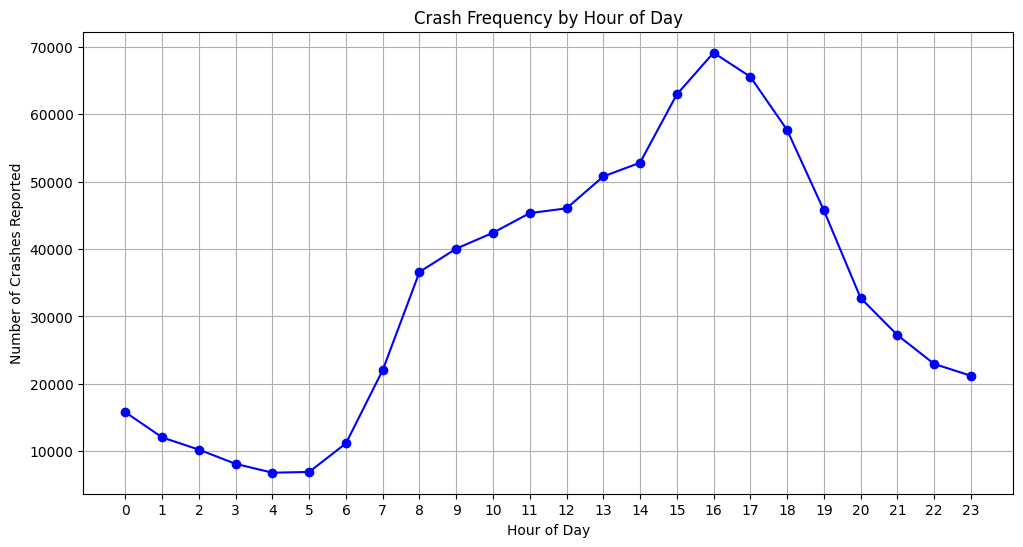

In [16]:
# Plotting
plt.figure(figsize=(12, 6))

# line plot
plt.plot(hourly_crashes.index, hourly_crashes.values, marker='o', linestyle='-', color='b')
plt.title('Crash Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes Reported')
plt.xticks(range(0, 24))
plt.grid(True)

### 2.11) EDA of Crash Counts by Day of the Week (by Junah Liu)

Crash Counts by Day of the Week:
DAY_NAME
Monday       118051
Tuesday      118374
Wednesday    116625
Thursday     116795
Friday       127363
Saturday     116323
Sunday        98832
Name: count, dtype: int64


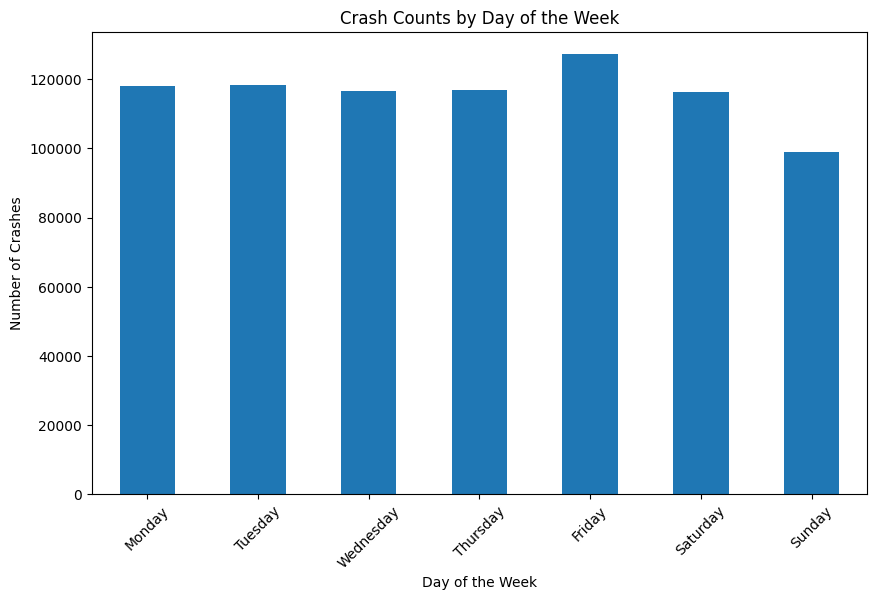

In [17]:
# Extract day of week and hour from 'DATE_POLICE_NOTIFIED'
crashes_df['DAY_OF_WEEK'] = crashes_df['DATE_POLICE_NOTIFIED'].dt.dayofweek
crashes_df['HOUR'] = crashes_df['DATE_POLICE_NOTIFIED'].dt.hour

# Map the 'DAY_OF_WEEK' numerical values to day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
crashes_df['DAY_NAME'] = crashes_df['DAY_OF_WEEK'].map(day_names)

# Display crash counts by day name
dayofweek_counts_named = crashes_df['DAY_NAME'].value_counts().reindex(day_names.values())
print("Crash Counts by Day of the Week:")
print(dayofweek_counts_named)

# Visualize crash counts by day of the week with day names
plt.figure(figsize=(10, 6))
dayofweek_counts_named.plot(kind='bar')
plt.title('Crash Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

# **3.0) Hypotheses**

# **3.1) Visualization 1 (by Junha Liu)**

### Hypothesis 1:

## Heatmap of Crash Frequency by Day of Week and Hour

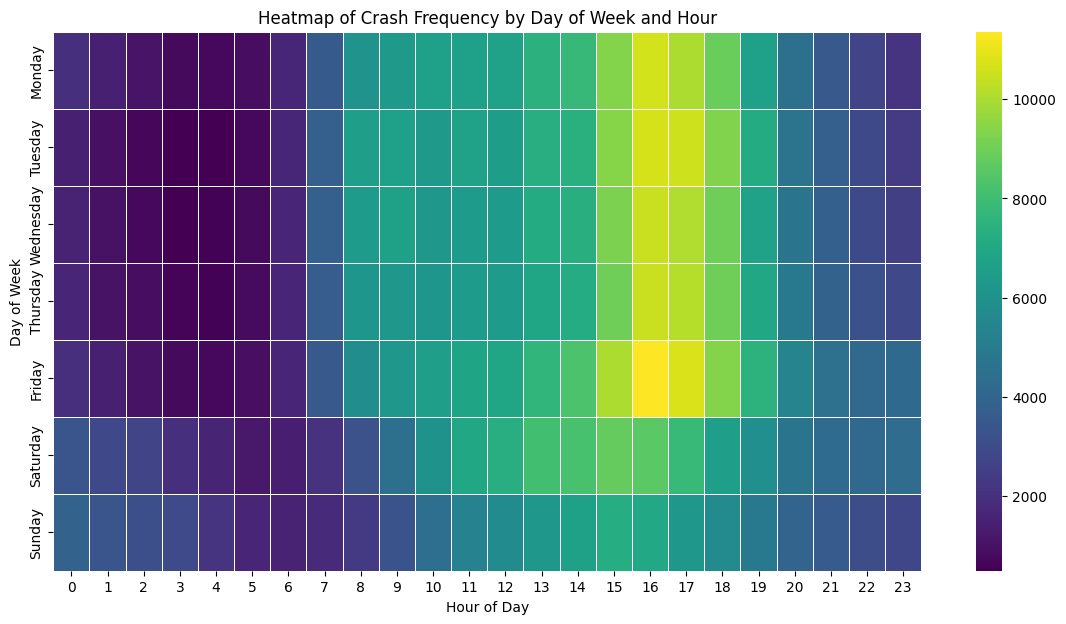

In [18]:
# Pivot table to aggregate crash counts by day name and hour
pivot_table = crashes_df.pivot_table(index='DAY_NAME', columns='HOUR', values='CRASH_RECORD_ID', aggfunc='count', fill_value=0)
pivot_table = pivot_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Crash Frequency by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

## Daily Crash Counts Over Time

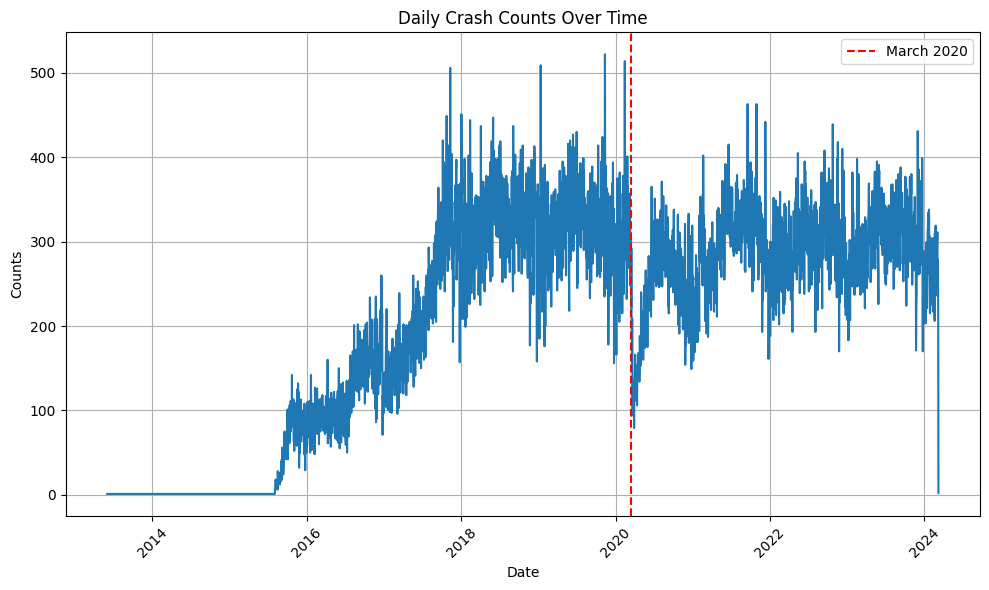

In [19]:
crashes_df['DATE'] = crashes_df['DATE_POLICE_NOTIFIED'].dt.date
crashes_by_date = crashes_df.groupby('DATE').size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
plt.plot(crashes_by_date['DATE'], crashes_by_date['counts'])
plt.title('Daily Crash Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(True)

# Highlight March 2020
march_2020_start = pd.to_datetime('2020-03-15')
plt.axvline(x=march_2020_start, color='red', linestyle='--', label='March 2020')

plt.legend()
plt.tight_layout()
plt.show()
del crashes_df

The data reveals a significant decrease in traffic crashes around March 2020, coinciding with the onset of COVID-19 related shutdowns and restrictions. This period marked a global shift towards remote work, reduced travel, and the temporary closure of many workplaces, leading to substantially less traffic on the roads. The reduced traffic volume directly contributed to fewer traffic collisions, highlighting how changes in societal behavior and mobility patterns can have a pronounced impact on road safety. This observation underscores the importance of considering external factors, such as public health crises, in traffic and urban planning to enhance road safety outcomes.

# **3.2) Visualization 2 (by Jackson Weisner)**

### Hypothesis 1:
Collisons in conditions other than 'CLEAR' are more likely to have fatal injuries.

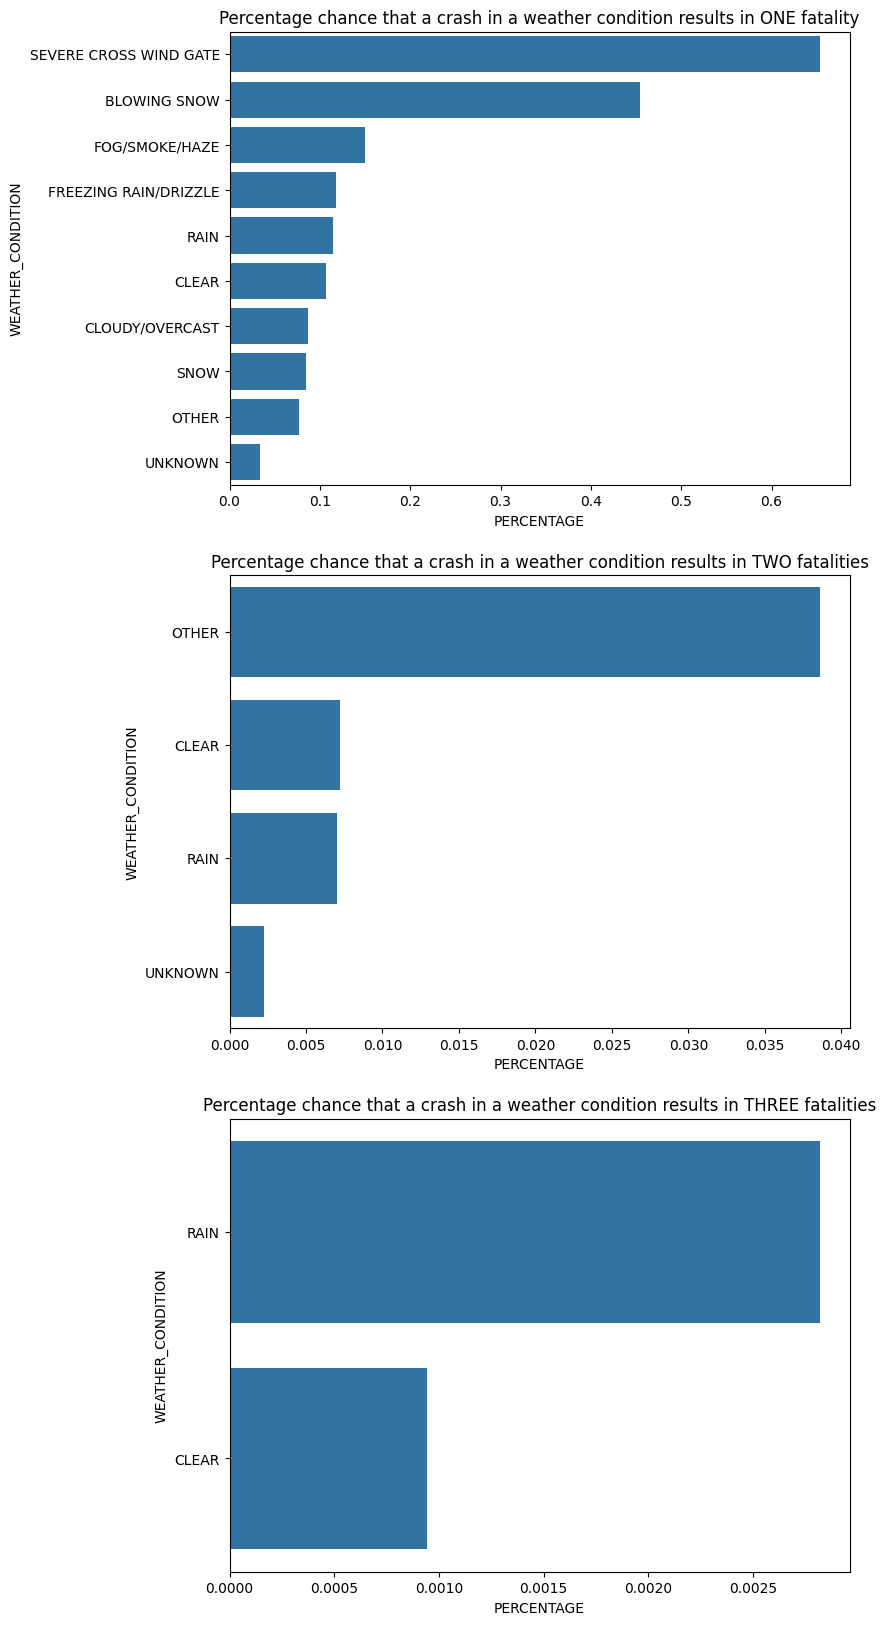

In [20]:
crashes_df = pd.read_csv('../data/chicago.csv', low_memory=False)
crash_weather = crashes_df.groupby('WEATHER_CONDITION')

total_per_condition = crash_weather['WEATHER_CONDITION'].count().to_frame()
total_per_condition = total_per_condition.rename(columns={'WEATHER_CONDITION':'TOTAL'}).reset_index()

def create_percentage_df(lambd):
    fatal_weather = crashes_df.loc[lambd(crashes_df['INJURIES_FATAL']), ['INJURIES_FATAL', 'WEATHER_CONDITION']].groupby('WEATHER_CONDITION').count()
    fatal_percenteges = pd.merge(total_per_condition, fatal_weather, how='outer', on='WEATHER_CONDITION')
    fatal_percenteges['PERCENTAGE'] = (fatal_percenteges['INJURIES_FATAL'] / fatal_percenteges['TOTAL']) * 100
    fatal_percenteges = fatal_percenteges.dropna().sort_values(by='PERCENTAGE', ascending=False)
    return fatal_percenteges

one_fatality = create_percentage_df(lambda v : v == 1.0)
two_fatalities = create_percentage_df(lambda v : v == 2.0)
three_fatalities = create_percentage_df(lambda v : v == 3.0)


figure, ax = plt.subplots(3, 1, figsize=(8,20))

plot_1 = sns.barplot(one_fatality, y='WEATHER_CONDITION', x='PERCENTAGE', ax=ax[0], orient='h')
plot_2 = sns.barplot(two_fatalities, y='WEATHER_CONDITION', x='PERCENTAGE', ax=ax[1], orient='h')
plot_3 = sns.barplot(three_fatalities, y='WEATHER_CONDITION', x='PERCENTAGE', ax=ax[2], orient='h')

plot_1.set_title('Percentage chance that a crash in a weather condition results in ONE fatality')
plot_2.set_title('Percentage chance that a crash in a weather condition results in TWO fatalities')
plot_3.set_title('Percentage chance that a crash in a weather condition results in THREE fatalities')

plt.show()
del crashes_df

## Conclusion:
From my analysis I observed the percent chance that a crash in a certain weather condition results in fatal injuries. The weather condition with the highest chance for one fatal injury is ‘SEVERE CROSS WIND GATE’ with approximately 0.6% chance, this is almost six times more than the percent chance for a single fatal injury in ‘CLEAR’ weather conditions. Out of the ten conditions the median conditions were ‘CLEAR’ and ‘RAIN’ when looking at the percent chance for a single fatal injury. 

The second graph looks at the percent chance that a crash in a certain weather condition results in two fatal injuries. The chances are about a factor of ten lower than the chance for a single fatality. Besides ‘OTHER’, ‘CLEAR’ is the most likely to result in two fatal injuries, which is interesting because it was not as likely compared to the other conditions in the previous graph.

The third graph looks at the percent chance that a crash in a certain weather condition results in three fatal injuries. This had less data to analyze, and the percent chance was another factor of 10 lower than the previous graph. But the ‘RAIN’ condition was much more likely to result in three fatal injuries than the ‘CLEAR’ condition.

According to my analysis, the ‘CLEAR’ condition is not the least dangerous condition in terms of fatal injuries, but it is also not the safest condition. This supports my hypothesis.


# **3.3) Visualization 3 (by Prit Patel)**

### Hypothesis 3: 
Severity of injury increases as darkness increases. The likeliness for a fatal injury in the dark is almost 4x the amount in the day.

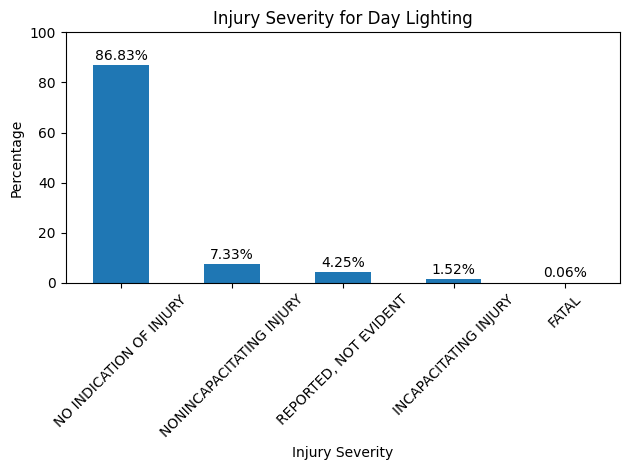

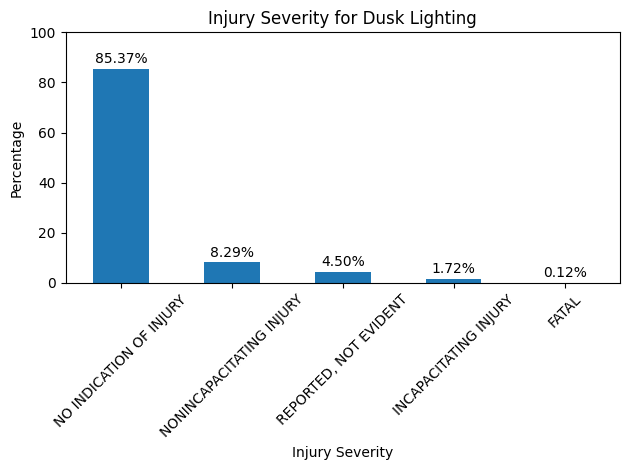

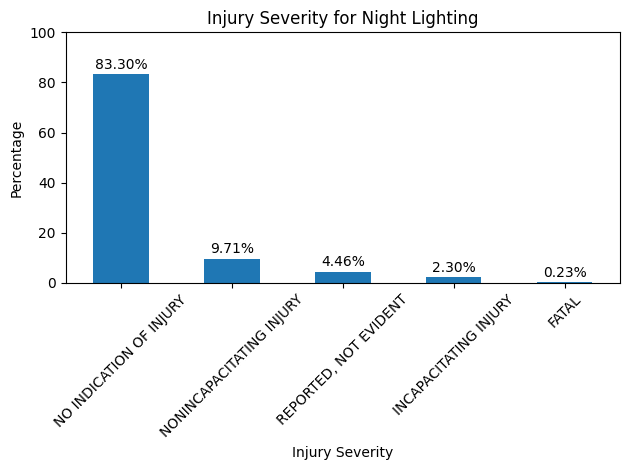

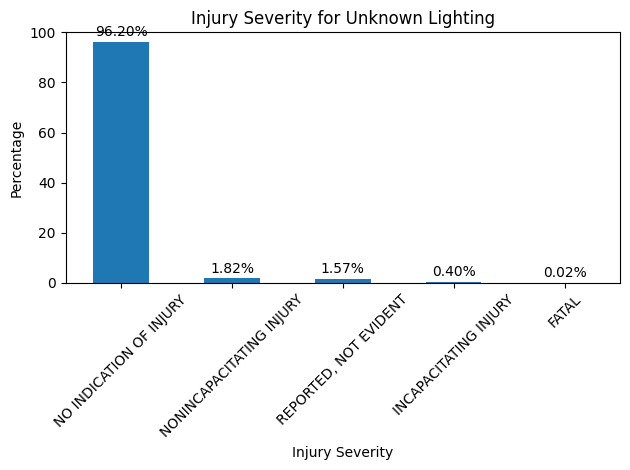

In [21]:
traffic_crashes = pd.read_csv('../data/chicago.csv', low_memory=False)
injury_severity = traffic_crashes['MOST_SEVERE_INJURY']
lighting_conditions = traffic_crashes['LIGHTING_CONDITION']
combined = pd.merge(lighting_conditions, injury_severity, left_index=True, right_index=True)

types = {
    'DAYLIGHT': 'Day',
    'DUSK': 'Dusk',
    'DARKNESS, LIGHTED ROAD': 'Night',
    'DARKNESS': 'Night',
    'UNKNOWN': 'Unknown'
}

combined['Lighting_Category'] = combined['LIGHTING_CONDITION'].map(types)

for type in ['Day', 'Dusk', 'Night', 'Unknown']:
    each_type = combined[combined['Lighting_Category'] == type]
    count = each_type['MOST_SEVERE_INJURY'].value_counts(normalize=True) * 100
    count.plot(kind='bar')

    plt.title(f'Injury Severity for {type} Lighting')
    plt.xlabel('Injury Severity')
    plt.ylabel('Percentage')

    for i, v in enumerate(count):
        plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

del traffic_crashes

# **3.4) Visualization 4 (by Mohammed Riaz)**

### Hypothesis 4:
Adverse roadway conditions will increase the likeliness an accident takes place due to some primary contributing causes. (Icy, snowy, wet conditions vs. Dry conditions)

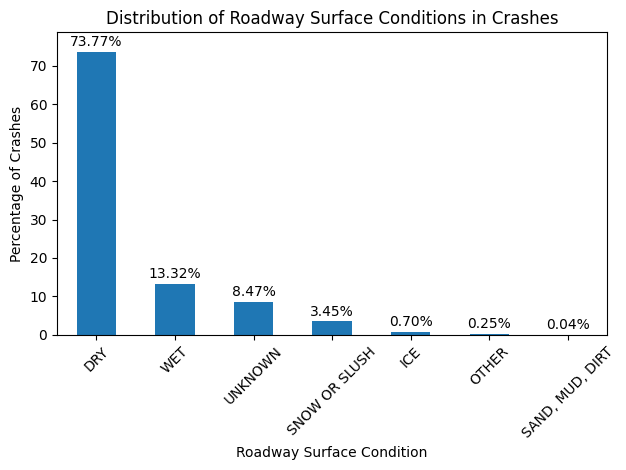

In [22]:
crashes_df = pd.read_csv('../data/chicago.csv', low_memory=False)
roadway_surface_counts = crashes_df['ROADWAY_SURFACE_COND'].value_counts()
total = roadway_surface_counts.sum()
percentage = (roadway_surface_counts / total) * 100 

ax = percentage.plot(kind='bar')
plt.title('Distribution of Roadway Surface Conditions in Crashes')
plt.xlabel('Roadway Surface Condition')
plt.ylabel('Percentage of Crashes')
plt.xticks(rotation=45)  

plt.ylim(0, percentage.max() + 5)  

for i, v in enumerate(percentage):
    ax.text(i, v + (percentage.max() * 0.01), f"{v:.2f}%", ha='center', va='bottom')  # Adjust the position for the text

plt.tight_layout() 
plt.show()
del crashes_df

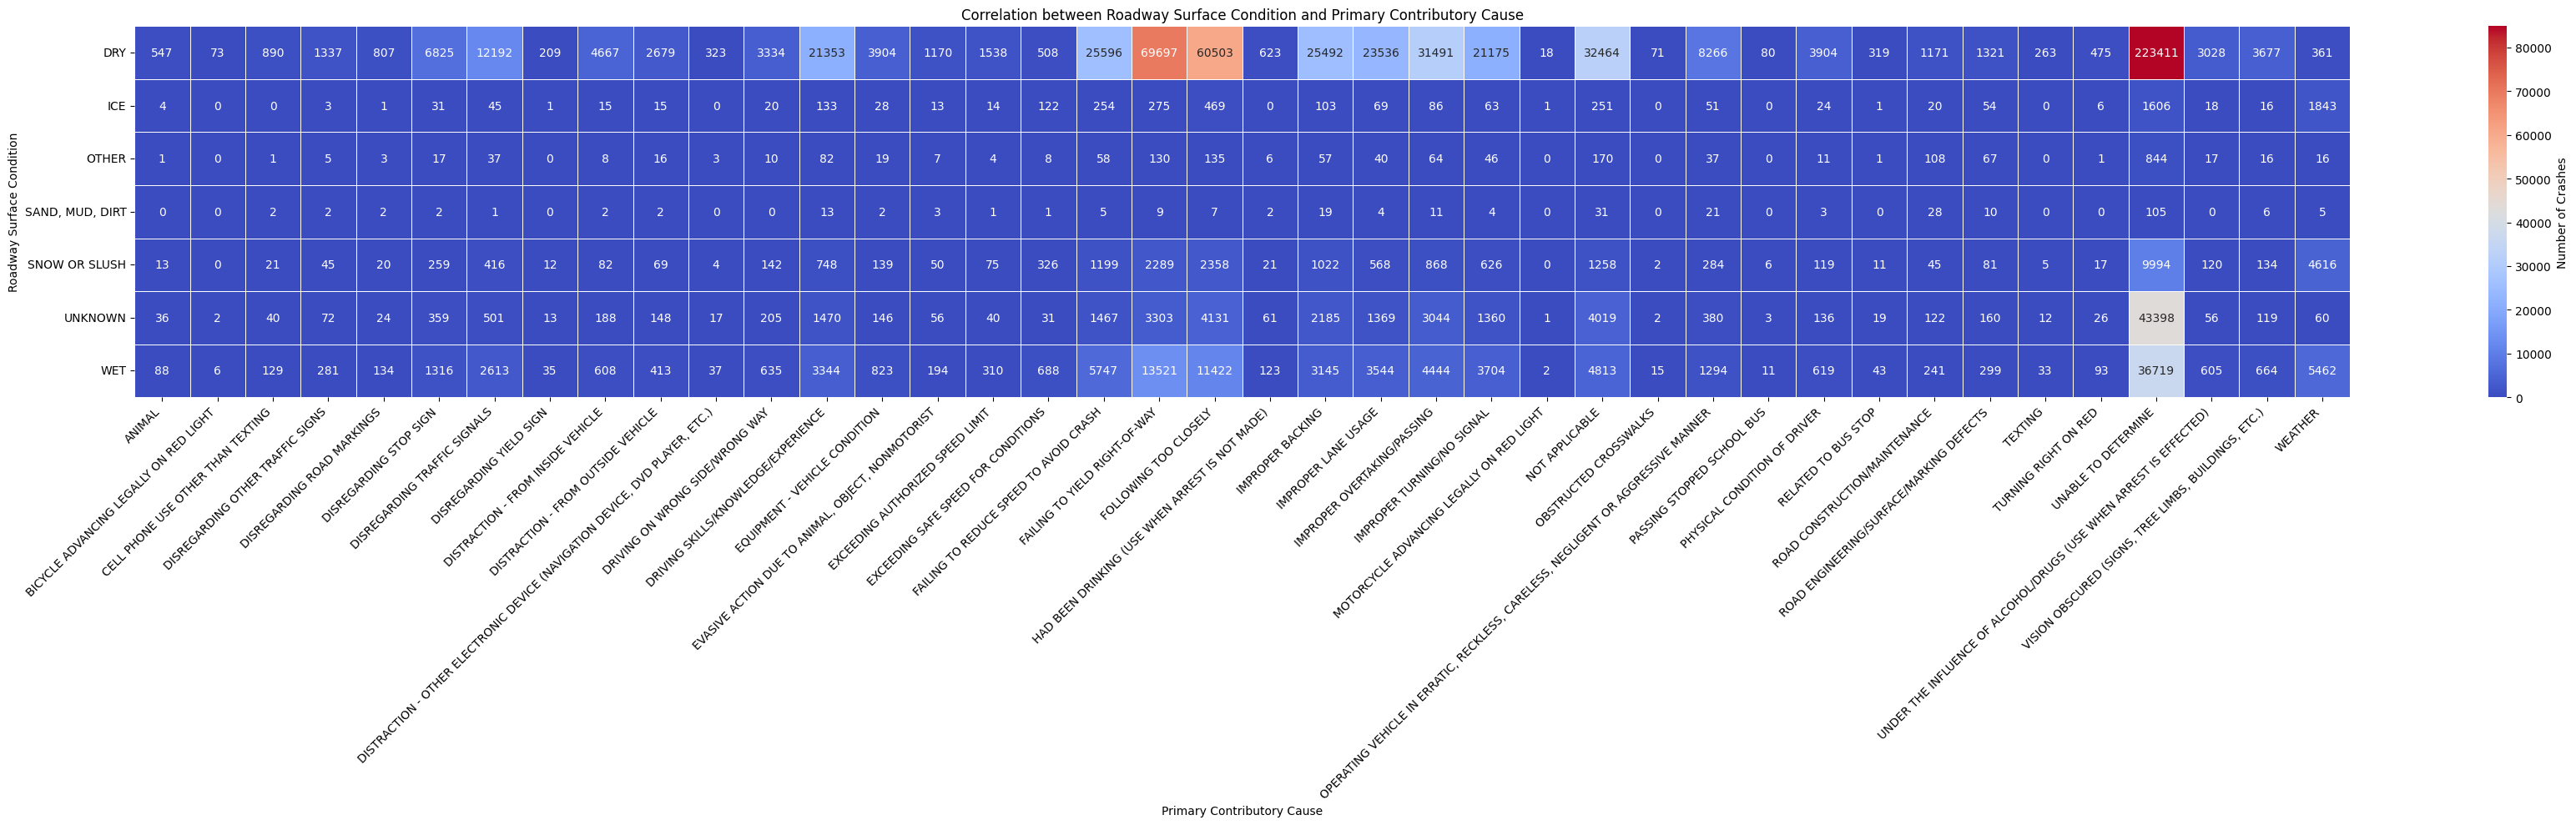

In [23]:
df_new_crashes = pd.read_csv('../data/chicago.csv')
crosstab = pd.crosstab(df_new_crashes['ROADWAY_SURFACE_COND'], df_new_crashes['PRIM_CONTRIBUTORY_CAUSE'])

vmax_setting = crosstab.values.max() * .38

plt.figure(figsize=(35, 10))

sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm', linewidths=.5, vmax=vmax_setting, cbar_kws={'label': 'Number of Crashes'})

plt.title('Correlation between Roadway Surface Condition and Primary Contributory Cause')
plt.ylabel('Roadway Surface Condition')
plt.xlabel('Primary Contributory Cause')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0) 

plt.tight_layout() 
plt.show()



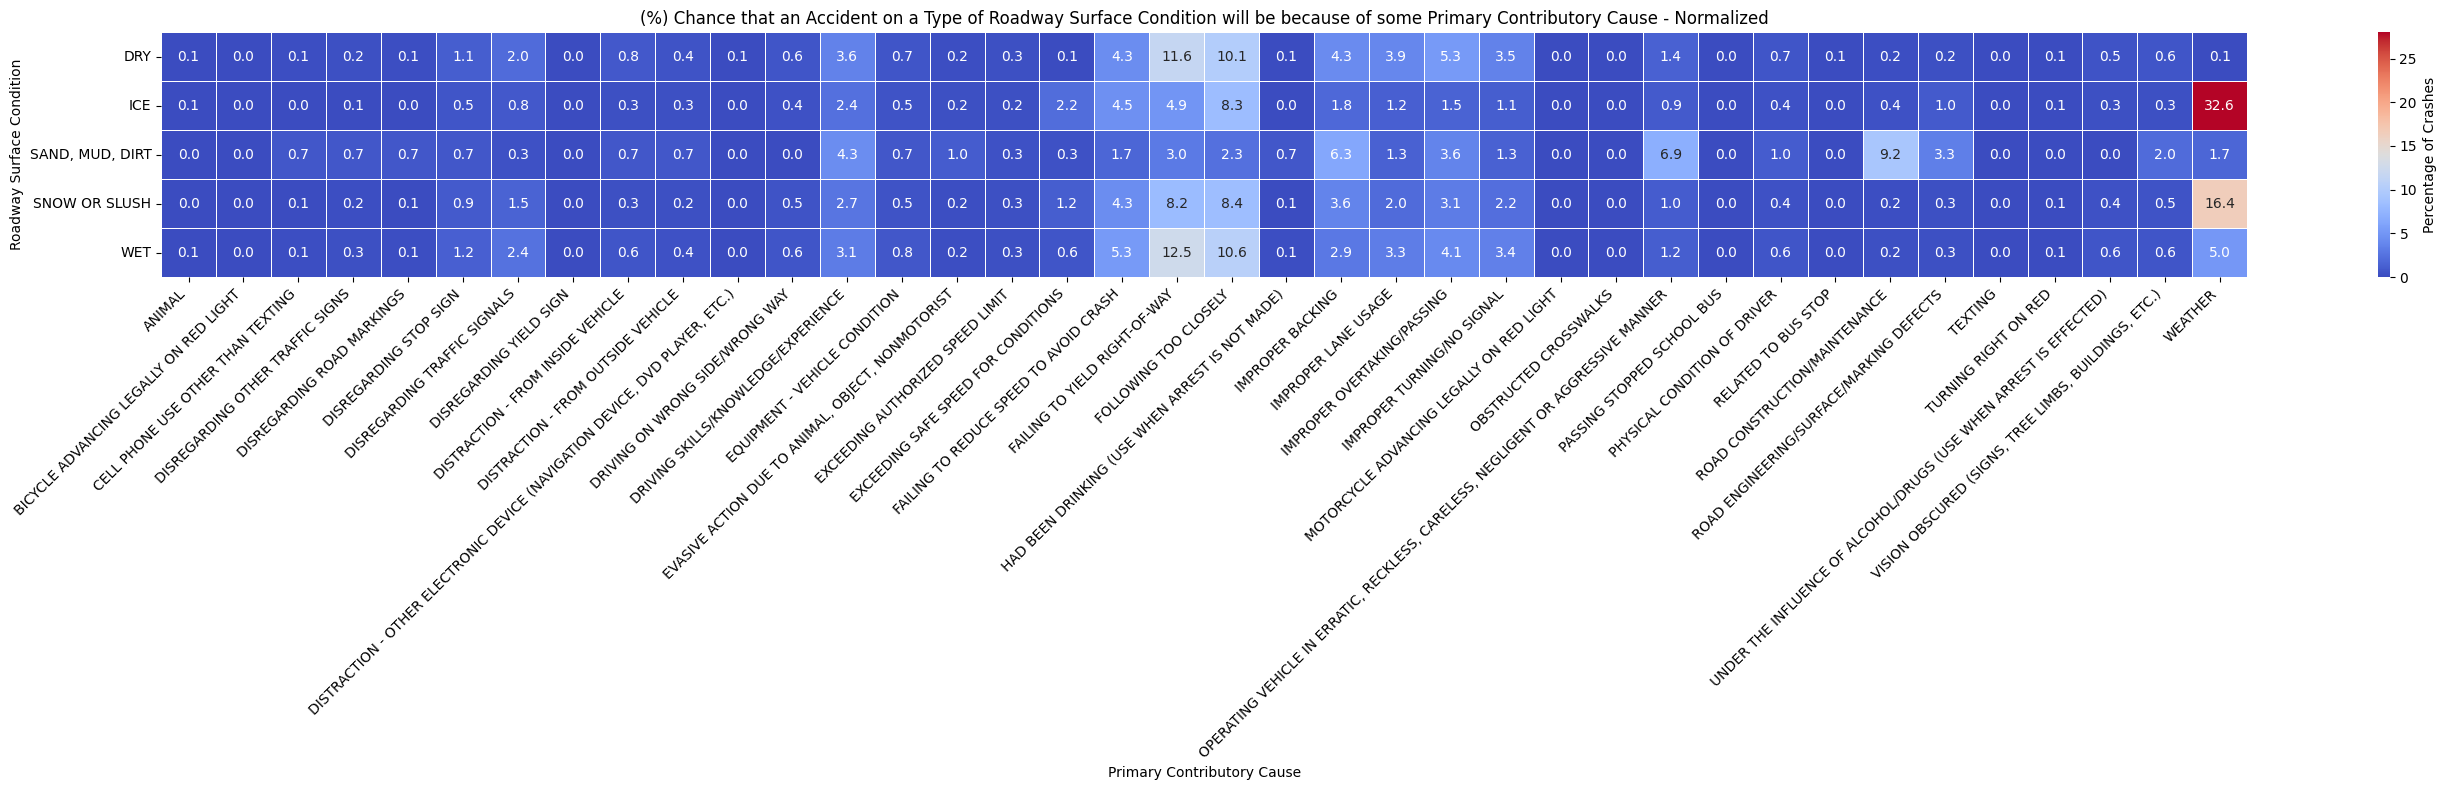

In [24]:
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0) * 100 
crosstab_normalized = crosstab_normalized.drop(columns=['UNABLE TO DETERMINE'], errors='ignore')
crosstab_normalized = crosstab_normalized.drop(columns=['NOT APPLICABLE'], errors='ignore')
crosstab_normalized = crosstab_normalized.drop(columns=['UNKNOWN'], errors='ignore')
crosstab_normalized = crosstab_normalized.drop('UNKNOWN', axis=0, errors='ignore')
crosstab_normalized = crosstab_normalized.drop('OTHER', axis=0, errors='ignore')

plt.figure(figsize=(28, 8))
sns.heatmap(crosstab_normalized, annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Percentage of Crashes'}, vmax = 28)
plt.title('(%) Chance that an Accident on a Type of Roadway Surface Condition will be because of some Primary Contributory Cause - Normalized')
plt.ylabel('Roadway Surface Condition')
plt.xlabel('Primary Contributory Cause')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
del df_new_crashes

## Conclusion:

Based on the analysis performed, my hypothesis is indeed supported by the data. Although there are far more cases of traffic accidents in dry conditions, if we normalize this data set and look at the percentage of accidents that take place due to some primary contributing cause, we can see that there are a larger amount of normalized incidents that take place due to various primary contributing causes in adverse conditions. This data is normalized as a percentage of all contributing causes over a given roadway condition. For example, we can see that failing to yield right of way is a more common contributing cause in wet conditions than in dry conditions. This is a similar finding in the case of following too closely. Thus, my hypothesis is supported for at least some primary contributing being more likely in the case of adverse road conditions. 

# **3.5) Visualization 5 (by Erica Hammond)**

### Hypothesis 5:

Based of the initial data analysis in which we learned that men were most likely to be involved in traffic accidents, particularly men aged 22-31, the hypothesis would be that men are most likely involved in the greatest number of fatal accidents as well.

In [25]:
#just printing the first few rows of People for my edification, can delete later
people_df = pd.read_csv('../data/chicago_people.csv', low_memory=False)
column_names_df = pd.DataFrame(people_df.columns, columns=['Column Names'])
print("Column Names:")
display(column_names_df)

print("\nFirst 10 Rows:")
display(people_df.head(10))

Column Names:


,Column Names
0,PERSON_ID
1,PERSON_TYPE
2,CRASH_RECORD_ID
3,VEHICLE_ID
4,CRASH_DATE
5,SEAT_NO
6,CITY
7,STATE
8,ZIPCODE
9,SEX



First 10 Rows:


,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
5,O10041,DRIVER,dd1bce4bd6d0be4c247714dcabab44e6563c62b913229b...,9601.0,11/01/2015 11:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
6,O10062,DRIVER,4bd2ee6bb306902b99a9c2ae55cf4fcffec00879e39759...,9621.0,11/01/2015 12:30:00 PM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
7,O10066,DRIVER,9c03b6fcc6d72cf3ee2cb9ea754ea7e4617ab965142552...,9623.0,10/31/2015 04:00:00 PM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
8,O1007,DRIVER,2e7e0c1682100a200a46c25a532eda4febb00a2ae49ea9...,958.0,09/02/2015 02:35:00 PM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
9,O10088,DRIVER,8bf8069b3d839b732fd35d2c9d8caddeddbb4b8978e84d...,9645.0,11/01/2015 01:00:00 PM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [26]:
# print first 10 rows of Crashes
crashes_df = pd.read_csv('../data/chicago.csv', low_memory=False)
column_names_df = pd.DataFrame(crashes_df.columns, columns=['Column Names'])
print("Column Names:")
display(column_names_df)

print("\nFirst 10 Rows:")
display(crashes_df.head(10))

Column Names:


,Column Names
0,CRASH_RECORD_ID
1,CRASH_DATE_EST_I
2,CRASH_DATE
3,POSTED_SPEED_LIMIT
4,TRAFFIC_CONTROL_DEVICE
5,DEVICE_CONDITION
6,WEATHER_CONDITION
7,LIGHTING_CONDITION
8,FIRST_CRASH_TYPE
9,TRAFFICWAY_TYPE



First 10 Rows:


,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
5,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
6,35156ce97cab22747495e92e8bbb16c57e0e60dc3ce6d1...,NaN,02/06/2023 05:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,ONE-WAY,...,0.0,0.0,2.0,0.0,17,2,2,NaN,NaN,NaN
7,359bf9f5872d646bb63576e55b1e0b480dc93c2b935ab5...,NaN,01/31/2022 07:45:00 PM,25,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,REAR END,ONE-WAY,...,0.0,0.0,5.0,0.0,19,2,1,NaN,NaN,NaN
8,36360857c079418cba1b1d70cf653595bbfb4566de8fcb...,Y,01/01/2022 04:32:00 PM,10,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,PARKING LOT,...,0.0,0.0,2.0,0.0,16,7,1,NaN,NaN,NaN
9,37a215843a67b9d2118972242e0ab68232583ffe20401f...,NaN,10/18/2020 03:58:00 PM,35,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,1.0,0.0,15,1,10,NaN,NaN,NaN


The following scatterplot is a representation of all the available data concerning age, gender, and fatal injuries in relation to traffic accidents.

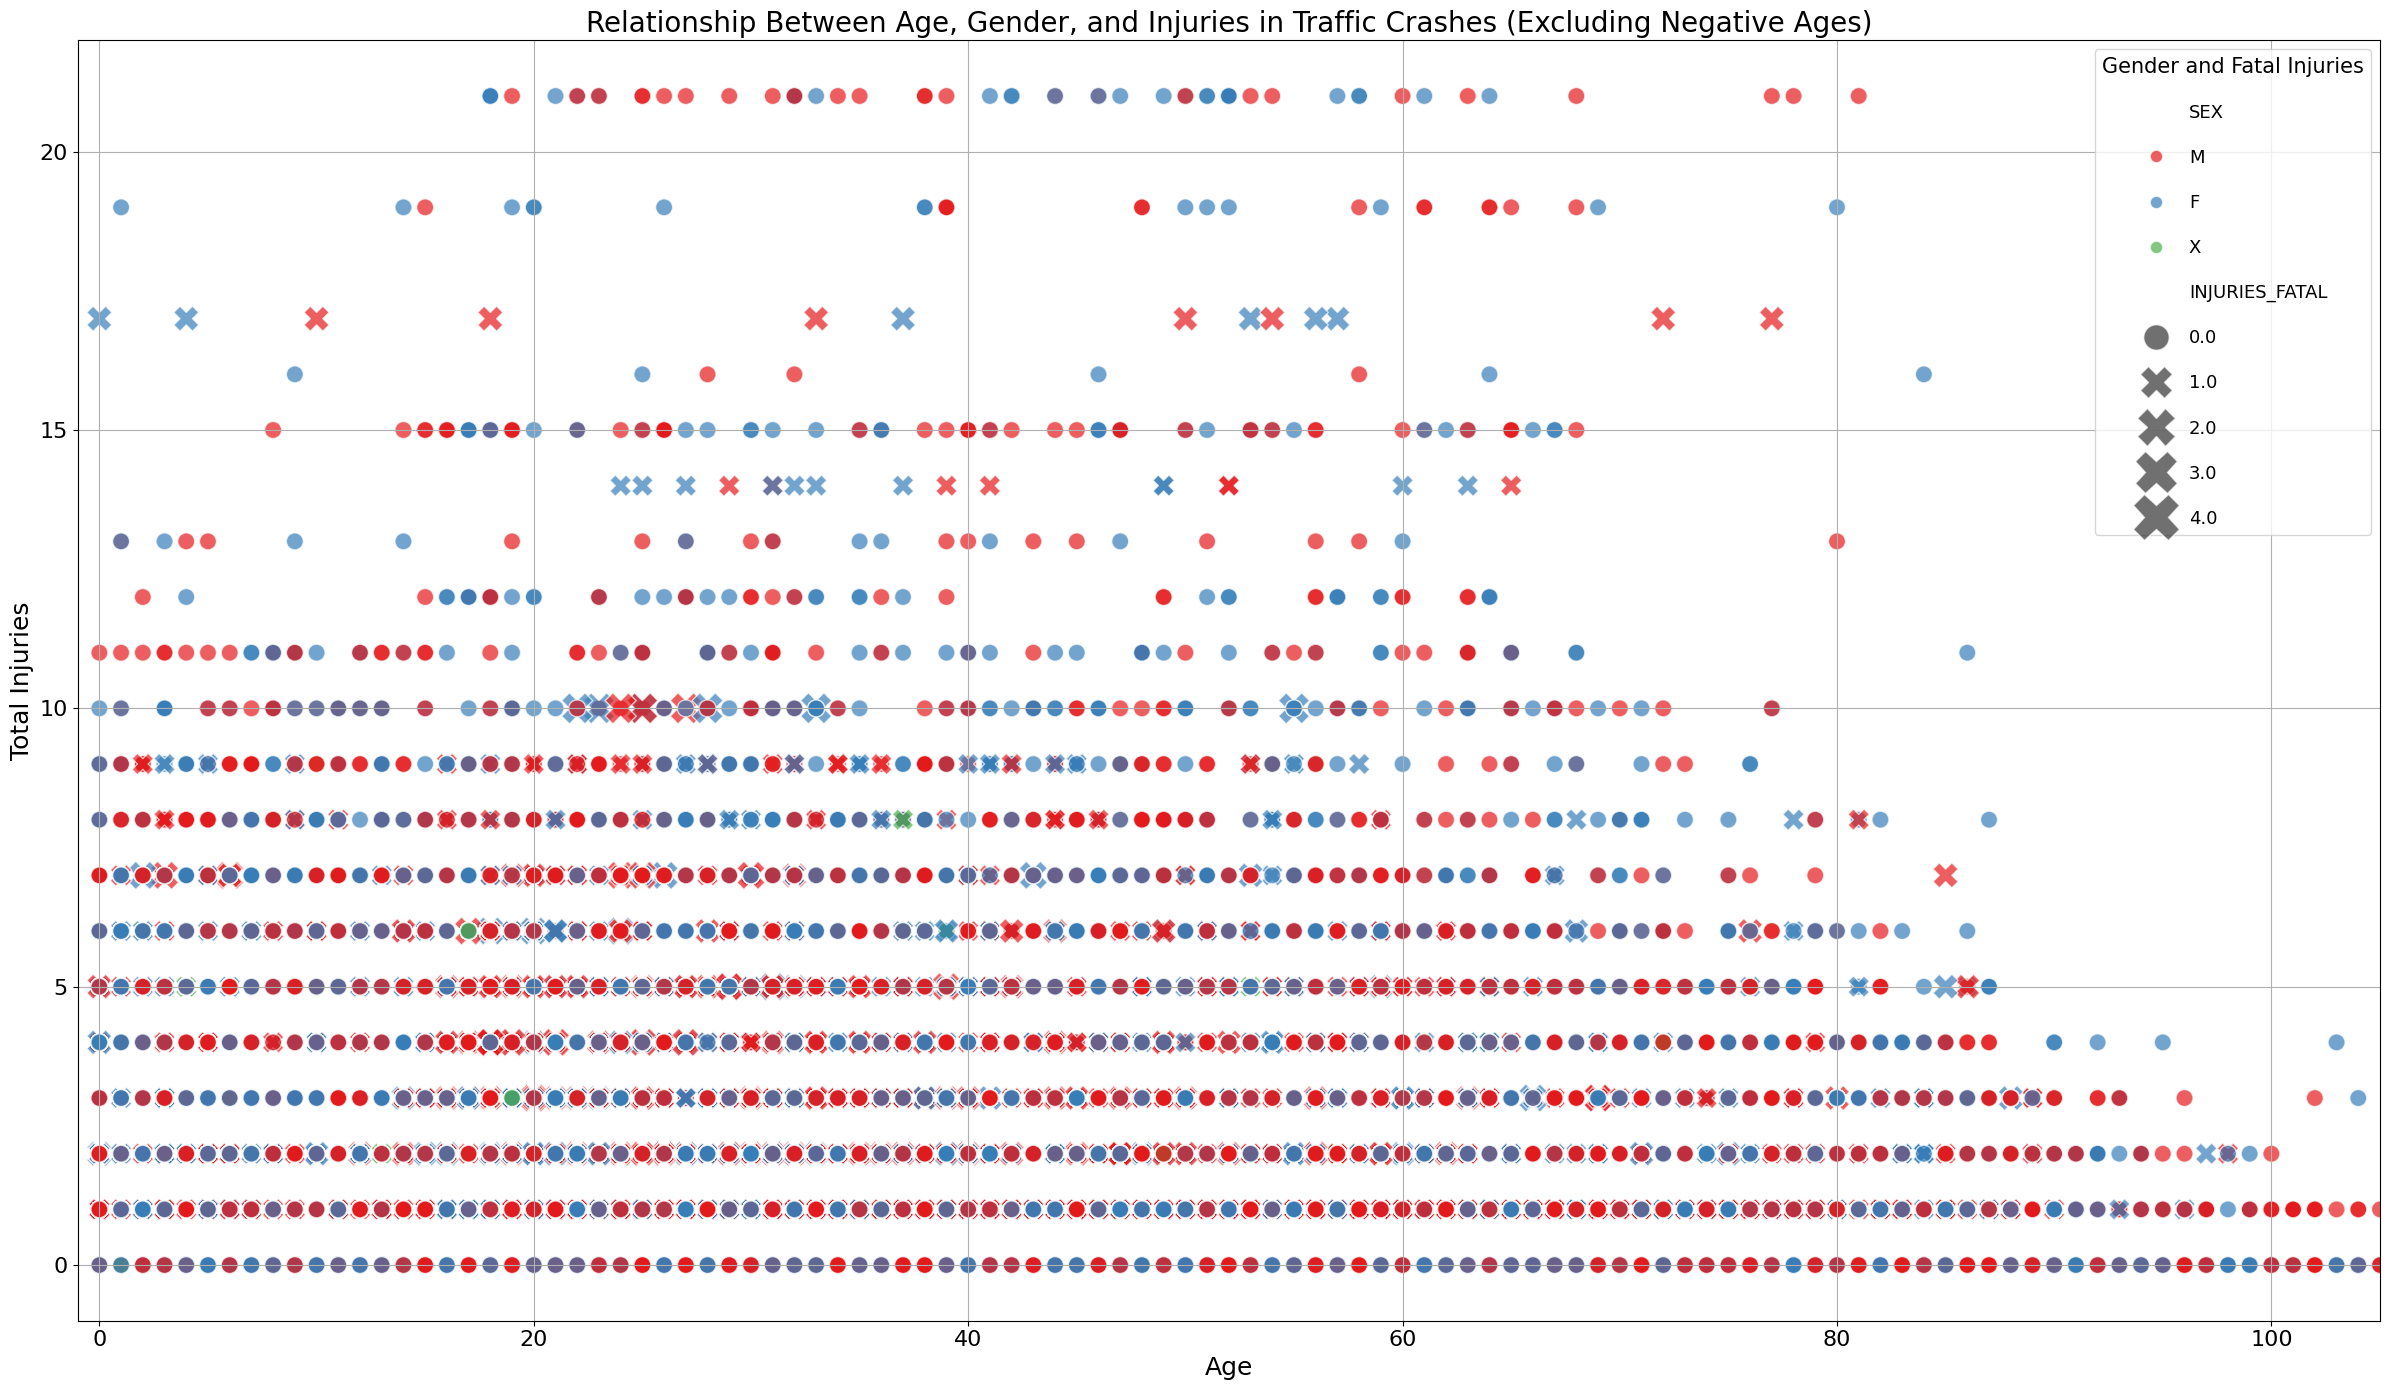

In [27]:
# ALL DATA

# first, merge on crash_record_id
merged_df = pd.merge(people_df, crashes_df, on='CRASH_RECORD_ID')
del people_df
del crashes_df
analysis_df = merged_df[["AGE", "SEX", "INJURIES_TOTAL", "INJURIES_FATAL"]]

filtered_df = analysis_df[analysis_df['AGE'] >= 0]

unique_fatal_injuries = filtered_df['INJURIES_FATAL'].unique()
markers = {value: 'X' if value > 0 else 'o' for value in unique_fatal_injuries}

# visualization parameters
plt.figure(figsize=(24, 14))
scatter_plot = sns.scatterplot(data=filtered_df, x="AGE", y="INJURIES_TOTAL", hue="SEX", style="INJURIES_FATAL", palette="Set1",
                               markers=markers, size="INJURIES_FATAL", sizes=(150, 500),
                               alpha=0.7)

plt.title('Relationship Between Age, Gender, and Injuries in Traffic Crashes (Excluding Negative Ages)', fontsize=20)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Total Injuries', fontsize=18)
plt.legend(title='Gender and Fatal Injuries', title_fontsize='15', fontsize='13', loc='upper right', labelspacing=1.5, markerscale=1.5)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

scatter_plot.set(xlim=(-1, 105), ylim=(-1, filtered_df['INJURIES_TOTAL'].max() + 1))

plt.tight_layout()

plt.show()

Since there is too much data to be readable, the below scatterplots determine the top 50 and the top 10 fatal accidents by age and gender.

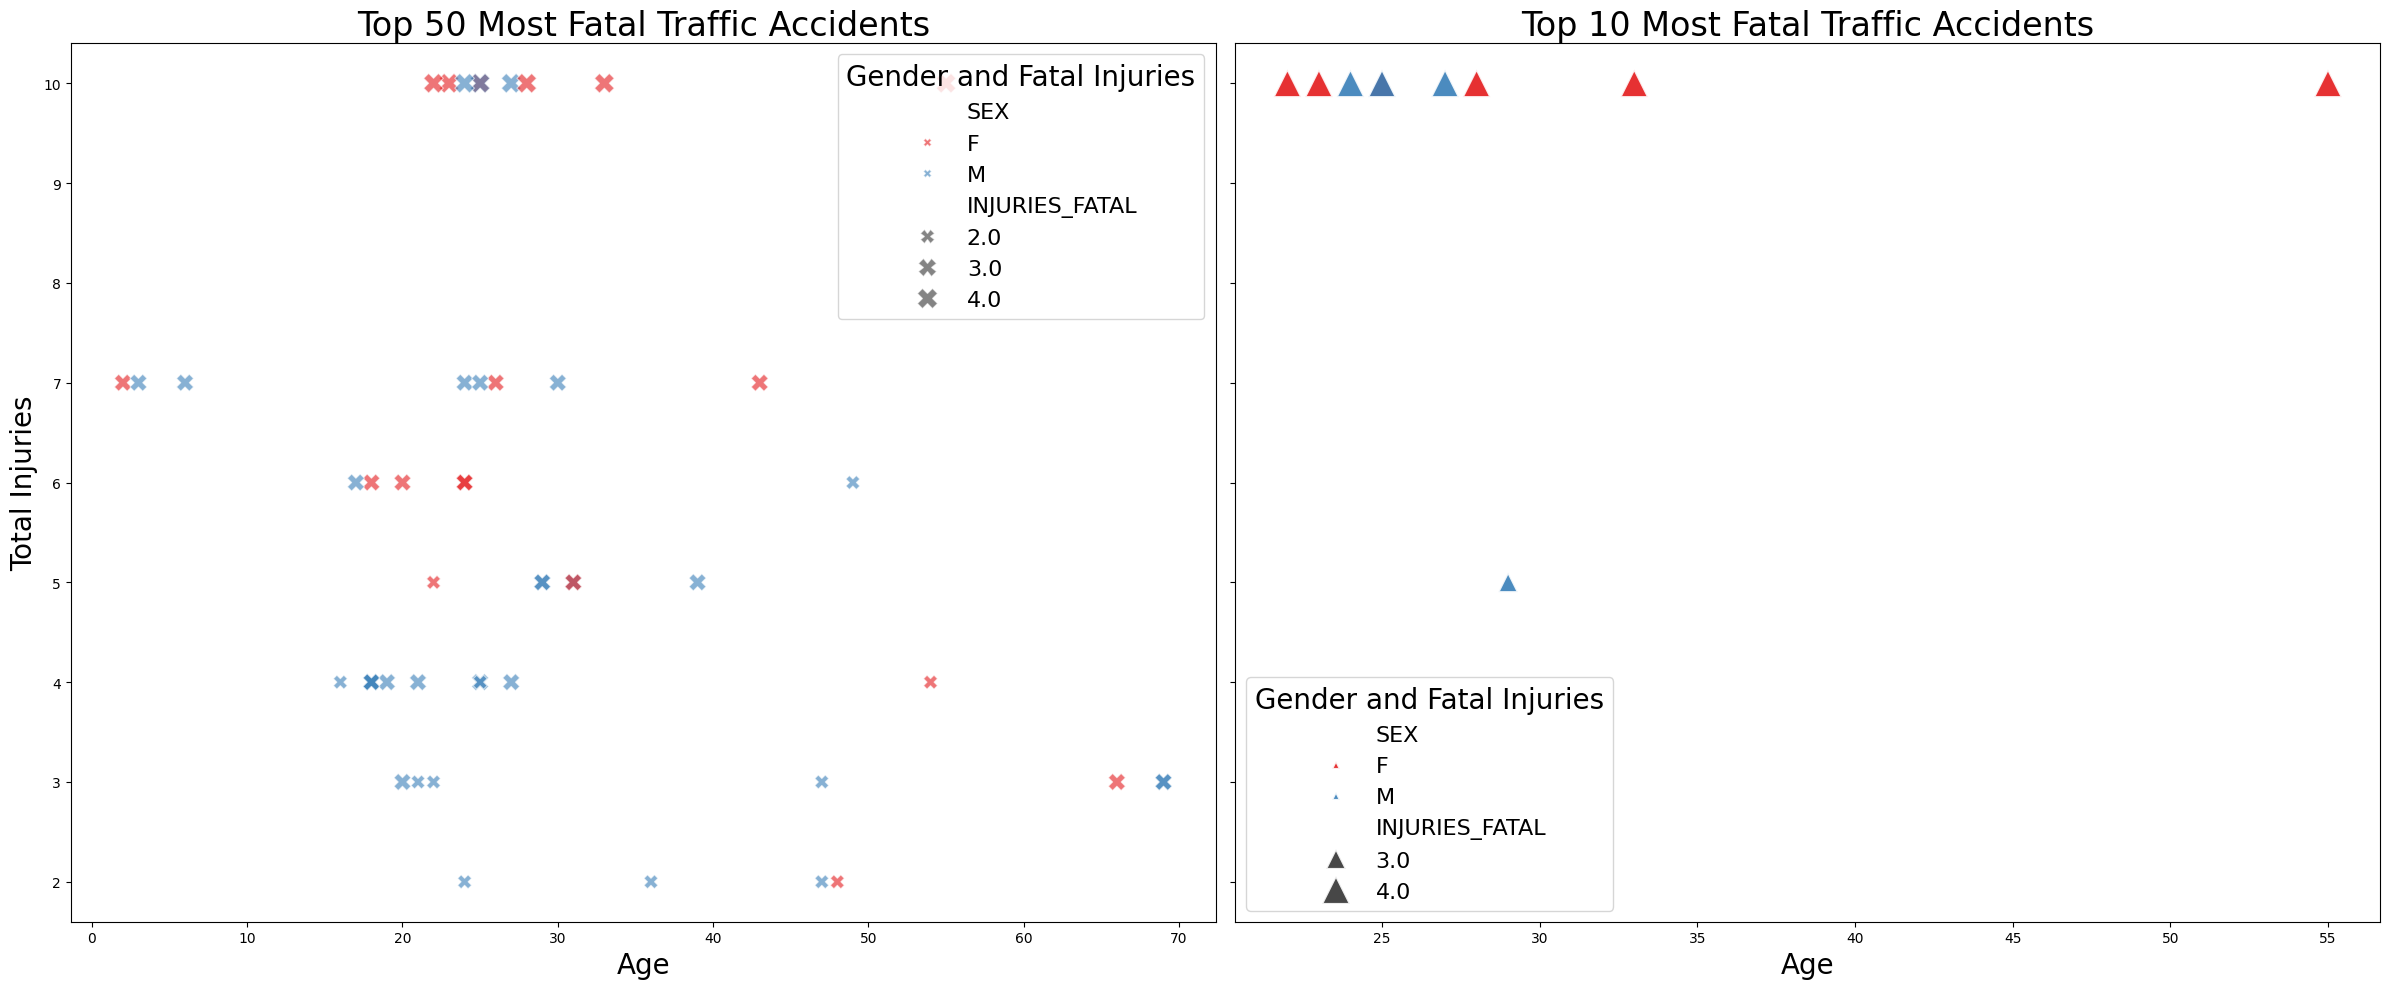

In [28]:
# two scatter plots to display the top 50 and top 10 most fatal accidents
sorted_df = filtered_df.sort_values('INJURIES_FATAL', ascending=False)

top_50_fatal_df = sorted_df.head(50)
top_10_fatal_df = top_50_fatal_df.head(10)

# Define markers
unique_markers = {value: 'X' if value > 0 else 'o' for value in sorted_df['INJURIES_FATAL'].unique()}
top_10_marker = '^'

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(24, 10), sharey=True)

# Top 50 most fatal accidents
sns.scatterplot(ax=axes[0], data=top_50_fatal_df, x="AGE", y="INJURIES_TOTAL", hue="SEX", style="INJURIES_FATAL",
                palette="Set1", markers=unique_markers, size="INJURIES_FATAL", sizes=(100, 200), alpha=0.6)

axes[0].set_title('Top 50 Most Fatal Traffic Accidents', fontsize=24)
axes[0].set_xlabel('Age', fontsize=20)
axes[0].set_ylabel('Total Injuries', fontsize=20)

# Top 10 most fatal accidents
sns.scatterplot(ax=axes[1], data=top_10_fatal_df, x="AGE", y="INJURIES_TOTAL", hue="SEX", style="INJURIES_FATAL",
                palette="Set1", markers={value: top_10_marker for value in top_10_fatal_df['INJURIES_FATAL'].unique()},
                size="INJURIES_FATAL", sizes=(200, 400), alpha=0.9)

axes[1].set_title('Top 10 Most Fatal Traffic Accidents', fontsize=24)
axes[1].set_xlabel('Age', fontsize=20)
# shares the y axis with the first plot

# legend and other settings
axes[0].legend(title='Gender and Fatal Injuries', title_fontsize='20', fontsize='16')
axes[1].legend(title='Gender and Fatal Injuries', title_fontsize='20', fontsize='16')
plt.tight_layout()

plt.show()

### Conclusion
The scatter plots reveal that the most fatal accidents do not necessarily concentrate around the 22-31 age group, as hypothesized. Instead, fatal accidents appear to be spread across a wider age range. This indicates that age may not be the sole or even primary predictor of fatality in accidents. Additionaly, the hypothesis suggested that men in the 22-31 age group would be most frequently involved in fatal accidents, but the data shows fatal accidents are more evenly distributed across different ages and both genders.
There is an obvious difference between being involved in an accident and being involved in a fatal accident. The hypothesis may still hold for overall involvement, but not when it comes to fatal accidents. The top 10 scatter plot, which should represent the most fatal accidents, shows sparse data points. This suggests that while fatalities do occur across different age groups, they are relatively rare events compared to overall accident involvement.

From the analysis, we can determine that age/gender are not enough on their own to inform policy. Perhaps we can delve into the multiple factors during the ML analysis.

# **4.0) Machine Learning Analyses**

# **4.1) Machine Learning analysis 1 (by Jackson Weisner)**

### Hypothesis 1:
Factors such as blood alcohol content, physical condition, and sex increase the chance of the person using their cell phone while driving.

In [29]:
people_df = pd.read_csv("../data/chicago_people.csv", low_memory=False)

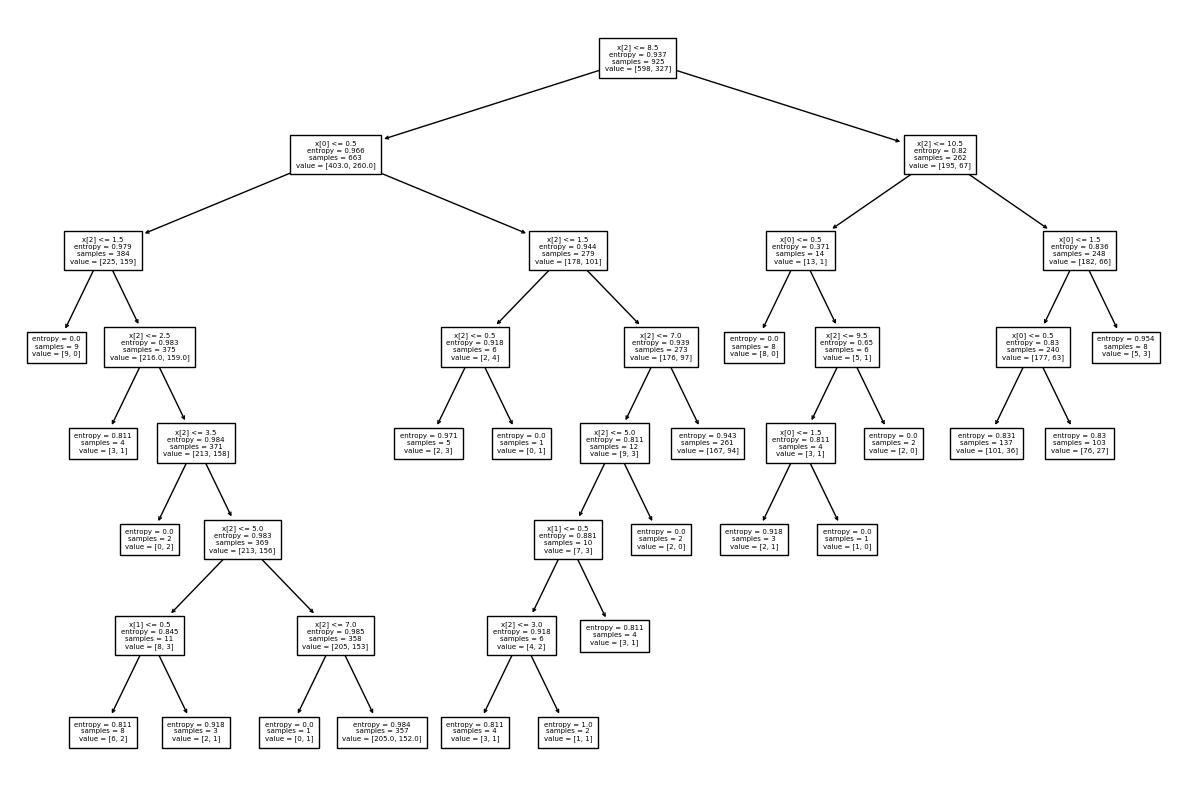

In [30]:
features = ['SEX', 'BAC_RESULT VALUE', 'PHYSICAL_CONDITION']
value = ['CELL_PHONE_USE'] 

cleaned_df = people_df[features + value]
cleaned_df.loc[cleaned_df['BAC_RESULT VALUE'] < 0.08, 'BAC_RESULT VALUE'] = 0
cleaned_df.loc[cleaned_df['BAC_RESULT VALUE'] >= 0.08, 'BAC_RESULT VALUE'] = 1
cleaned_df.loc[:, 'BAC_RESULT VALUE'] = cleaned_df['BAC_RESULT VALUE'].fillna(0)
cleaned_df = cleaned_df.dropna()

conditions = ['EMOTIONAL','FATIGUED/ASLEEP','HAD BEEN DRINKING','ILLNESS/FAINTED',
            'IMPAIRED - ALCOHOL','IMPAIRED - ALCOHOL AND DRUGS','IMPAIRED - DRUGS',
            'MEDICATED','NORMAL','OTHER','REMOVED BY EMS','UNKNOWN']
i = 0
for option in conditions:
    cleaned_df.loc[cleaned_df['PHYSICAL_CONDITION'] == option, 'PHYSICAL_CONDITION'] = i
    i += 1

cleaned_df.loc[cleaned_df['CELL_PHONE_USE'] == 'Y', 'CELL_PHONE_USE'] = 0
cleaned_df.loc[cleaned_df['CELL_PHONE_USE'] == 'N', 'CELL_PHONE_USE'] = 1

cleaned_df.loc[cleaned_df['SEX'] == 'M', 'SEX'] = 0
cleaned_df.loc[cleaned_df['SEX'] == 'F', 'SEX'] = 1
cleaned_df.loc[cleaned_df['SEX'] == 'X', 'SEX'] = 2

x = cleaned_df.loc[:, features].astype(int)
y = cleaned_df[value].astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

classifier = tree.DecisionTreeClassifier(criterion='entropy')
classifier = classifier.fit(x_train, y_train)
fig = plt.figure(figsize=(15,10))

tree.plot_tree(classifier, fontsize=5)
del people_df


My analysis using a decision tree resulted in low entropy values less than 0.2 for most leaves on the tree. Meaning the decision tree can classify with decent accuracy. I used 'SEX', 'BAC_RESULT VALUE', and 'PHYSICAL_CONDITION' as my features to classify if 'CELL_PHONE_USE' was Y (0) or N (1). Doing so showed that was 15 out of 21 leaves were classified as 'CELL_PHONE_USE' = Y, meaning the majority of crashes will have cell phone use. Observing the decision tree shows that there is a correlation between 'SEX', 'BAC_RESULT VALUE', 'PHYSICAL_CONDITION' and the 'CELL_PHONE_USE'.

# **4.2) Machine Learning analysis 2 (by Mohammed Riaz)**

### Hypothesis 2:

(hypothesis conclusion)

# **4.3) Machine Learning analysis 3 (by Erica Hammond)**

### Hypothesis 3:

(hypothesis conclusion)

# **4.4) Machine Learning analysis 4 (by Junha Liu)**

### Hypothesis 4:

(hypothesis conclusion)

# **4.5) Machine Learning analysis 5 (by Prit Patel)**

### Hypothesis 5:

(hypothesis conclusion)

# **5.0) Reflection**

(reflection and next steps)